Q: throw a dice 100 times, it it is 1 or 2, you go 1 step down, if it is 3,4,5 , you go 1 step up and if it is 6, you throw the dice again and walk up the resulting steps(1,2,3,4,5,6).cannot go below step 0 and have a 0.1% chance of falling down and if it happens u start over from step 0.
u bet u will reach higher than step 60

#### Generating the random walk

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(123)
random_walk = [0]
for x in range(100):
    step = random_walk[-1]
    dice = np.random.randint(1,7)
    if dice <= 2:
        step = max(0,step-1)   # cannot go below step 0
    elif dice<=5:
        step = step+1
    else:
        step = step + np.random.randint(1,7)
    random_walk.append(step)
    
print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


#### Visualizing the walk

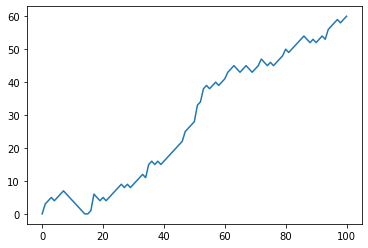

In [5]:
import matplotlib.pyplot as plt
plt.plot(random_walk)
plt.show()

In [6]:
# now we have 1 random walks and diff walks will end up with different steps
# so to calculate the chances, we need to simulate these random walks for 
# upto 1000 times.

In [33]:
all_walks = []
for i in range(10):
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice<=2:
            step = max(0,step-1)
        elif dice<=5:
            step=step+1
        else:
            step = step+np.random.randint(1,7)
        # chances of falling down
        if np.random.rand() <= 0.001:
            step=0
        random_walk.append(step)
        
    all_walks.append(random_walk)
    

In [34]:
np_aw = np.array(all_walks)
np_aw.shape

(10, 101)

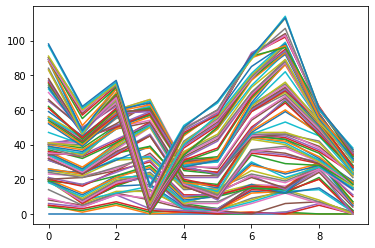

In [35]:
plt.plot(np_aw)
plt.show()

In [49]:
np_aw_t = np.transpose(np_aw)
# here every row represents the position after 1 throw for 10 random walks
np_aw_t.shape

(101, 10)

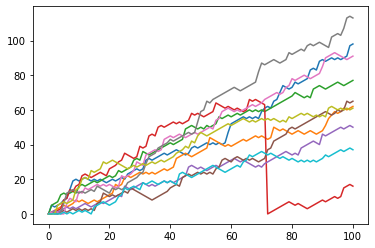

In [37]:
plt.plot(np_aw_t)
plt.show()

#### Calculating the chances

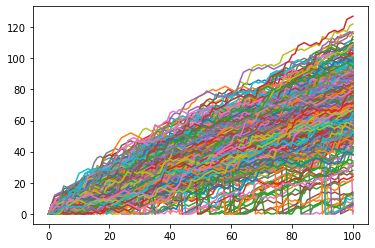

In [44]:
# for 500 simulations:
np.random.seed(123)
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

In [45]:
ends = np.array(np_aw_t[-1])
# ends has final position of the boy after every throw for 500 random walks 
# so shape of ends is (500,)
# so now we plot the histogram to see the distribution and infer results

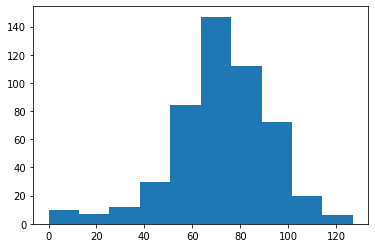

In [46]:
plt.hist(ends)
plt.show()

In [47]:
# to calculate the chances of winning the bet
# we calculate how many times the end pos was 60 or higher from 500.
len(ends[ends>=60])

392

In [48]:
(392/500)*100

78.4

#### Chances of winning - 78.4%